# K Mean Clustering

Objective: College application clustering  
Dataset: college.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('college.csv')
print(data.shape)
data.head()

(777, 19)


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [2]:
data.rename( columns={'Unnamed: 0':'college'}, inplace=True )
data.head()

,college,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Data Exploration

Yes    565
No     212
Name: Private, dtype: int64


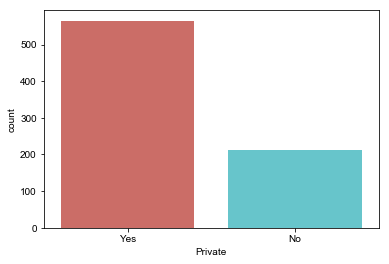

In [3]:
print(data['Private'].value_counts())

sns.countplot(x='Private',data = data, palette='hls',order = data['Private'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Convert Categorical to Numerical

In [4]:
data["Private"] = data["Private"].astype('category')
data["Private#"] = data["Private"].cat.codes 
data.head()

,college,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private#
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


## Drop Column

In [5]:
data.drop(['college','Private'],axis=1,inplace=True)
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private#
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [6]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private#
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,0.727156
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,0.445708
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,0.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,1.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,1.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,1.000000


## Correlation

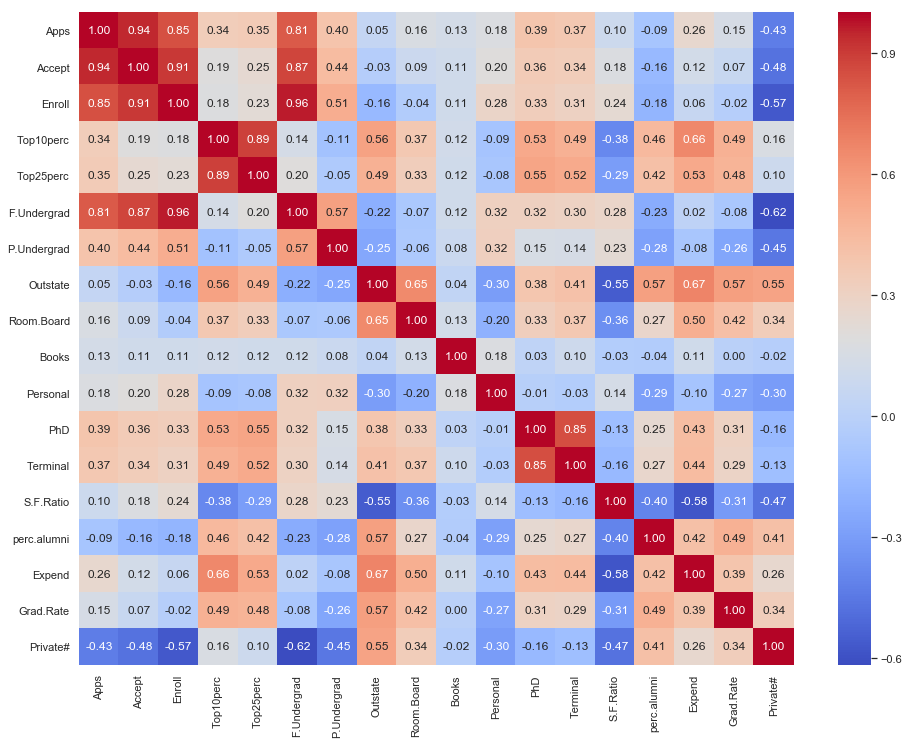

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## Data Standardization

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
X = mms.transform(data)
print('Dataset', X.shape)
X[0:2]

Dataset (777, 18)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.03288693, 0.04417701, 0.10791254, 0.23157895, 0.47252747,
        0.08716353, 0.02454774, 0.26342975, 0.23959647, 0.15775401,
        0.29770992, 0.65263158, 0.71052632, 0.41823056, 0.1875    ,
        0.0726714 , 0.46296296, 1.        ],
       [0.04384229, 0.07053089, 0.07503539, 0.15789474, 0.21978022,
        0.08075165, 0.05614839, 0.51342975, 0.73612863, 0.29144385,
        0.19083969, 0.22105263, 0.07894737, 0.26005362, 0.25      ,
        0.13838671, 0.42592593, 1.        ]])

## Find the Best K

In [9]:
from sklearn import metrics

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

[454.4352415083463, 259.24366200462623, 192.28902116511512, 170.17066394550073, 149.79904745744557, 141.7980166377875, 134.62315096355456, 129.16532680531387, 124.27068206611477, 120.65422679573996, 116.23957819050199, 112.65212165746527, 109.87981119669146, 106.66758702600103]


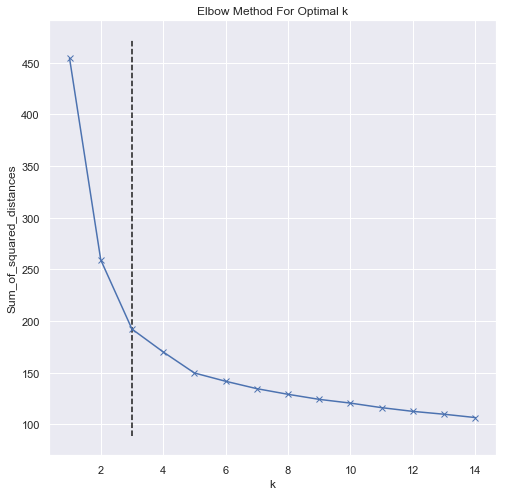

The best k: 3


In [10]:
y = Sum_of_squared_distances
x = range(1, len(y)+1)

from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print('The best k:', kn.knee)

## K Mean Clustering Modelling

In [11]:
clusterNum = kn.knee
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print('No. of cluster', labels.shape)
labels[0:10]

No. of cluster (777,)


array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0])

## Assign Labels Cluster to Dataframe

In [12]:
data["KM_Cluster"] = labels
data.head(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private#,KM_Cluster
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,0
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,0
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,2
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0


## Cluster 2D Visualization

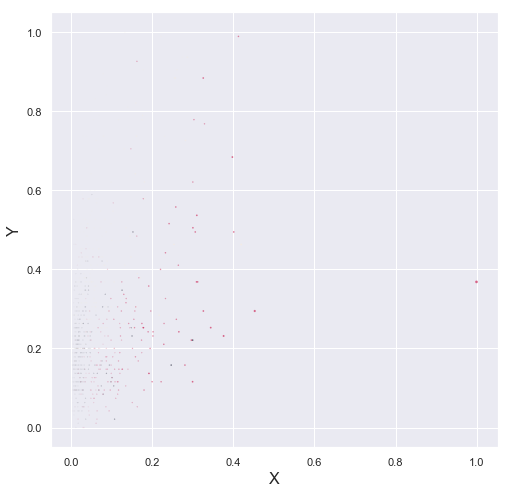

In [13]:
data.groupby('KM_Cluster').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

## Cluster 3D Visualization

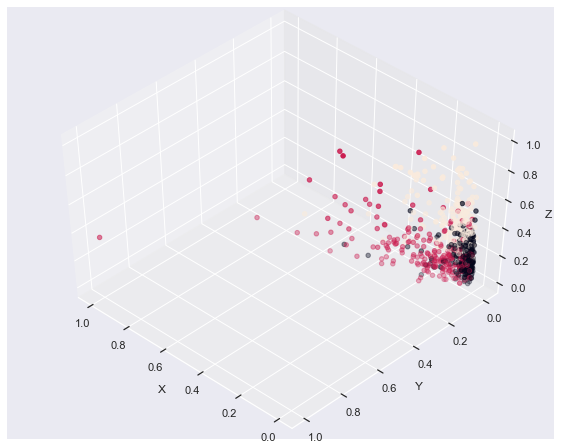

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## List and View Cluster

0    332
2    233
1    212
Name: KM_Cluster, dtype: int64


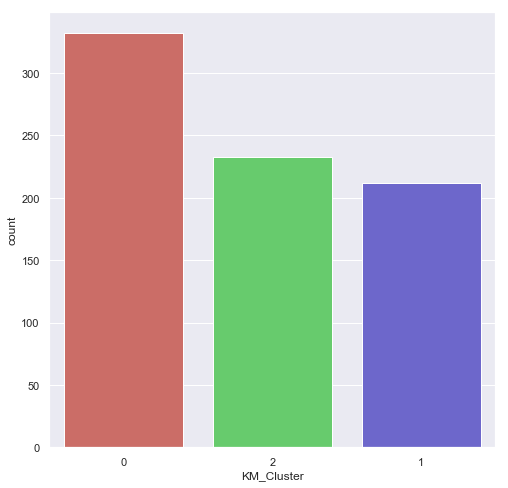

In [15]:
print(data['KM_Cluster'].value_counts())

sns.countplot(x='KM_Cluster',data = data, palette='hls',order = data['KM_Cluster'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [16]:
data[data['KM_Cluster']== 0].head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private#,KM_Cluster
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,0
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,0
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,1,0
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,1,0
12,1179,780,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,1,0
14,494,313,157,23,46,1317,1235,8352,3640,650,2449,36,69,11.1,26,8127,55,1,0
15,1420,1093,220,9,22,1018,287,8700,4780,450,1400,78,84,14.7,19,7355,69,1,0
17,1216,908,423,19,40,1819,281,10100,3520,550,1100,48,61,12.1,14,7994,59,1,0
